In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output

In [12]:
data = pd.read_csv('Ireviews.csv')
# Keeping only the neccessary columns
data = data[['Review','Sentiment']]
data.Review=data.Review.astype(str)
data.Sentiment=data.Sentiment.astype(str)

In [13]:
# Splitting the dataset into train and test set
train, test = train_test_split(data,test_size = 0.1)
# Removing neutral sentiments
train = train[train.Sentiment != "Neutral"]

Positive words


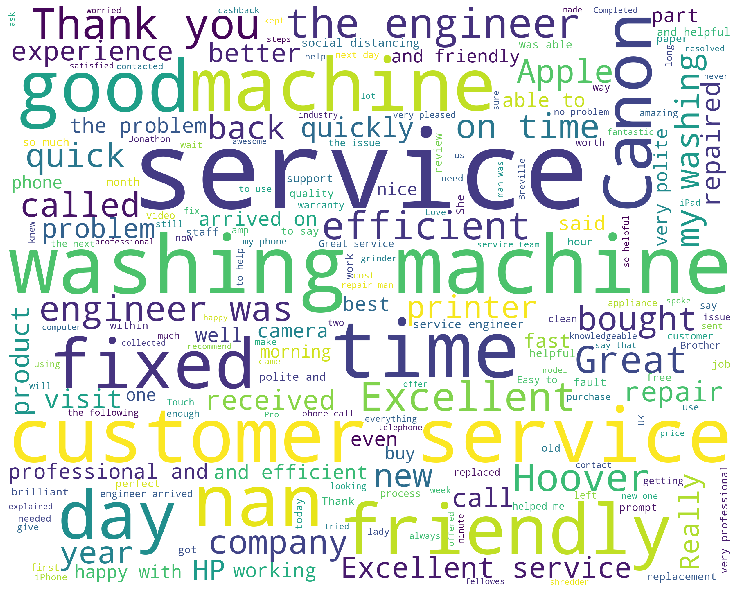

In [14]:
train_pos = train[train['Sentiment'] == 'POSITIVE']
train_pos = train_pos['Review']
train_neg = train[ train['Sentiment'] == 'NEGATIVE']
train_neg = train_neg['Review']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    fig = plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    wordcloud.to_file('SentimentP.png')
print("Positive words")
wordcloud_draw(train_pos,'white')
# fig.savefig('positive')
# print("Negative words")
# wordcloud_draw(train_neg)
